## Load Libraries

In [2]:
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l2


## Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dp = "/content/drive/MyDrive/Horse or Human- CNN/dataset/train"
validation_dp = "/content/drive/MyDrive/Horse or Human- CNN/dataset/validation"

# Data Preprocessing

In [5]:
training_dg = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')


In [6]:
training_data =  training_dg.flow_from_directory(train_dp,
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary')

Found 1027 images belonging to 2 classes.


In [7]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [8]:
valid_dg = ImageDataGenerator(rescale=1./255)

In [9]:
valid_data =  valid_dg.flow_from_directory(validation_dp,
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary')

Found 256 images belonging to 2 classes.


#Building CNN model

In [10]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3],kernel_regularizer=l2(l=0.01)),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),
                                    keras.layers.Dense(units=256, activation='relu'),
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [11]:
# compile cnn model
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model_path = '/content/drive/MyDrive/Horse or Human- CNN/horse_or_human.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [13]:
history = cnn_model.fit(training_data,
                          epochs=100,
                          verbose=1,
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 1.0202 - accuracy: 0.6144 
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/Horse or Human- CNN/horse_or_human.h5
33/33 [==============================] - 526s 16s/step - loss: 1.0202 - accuracy: 0.6144 - val_loss: 0.8166 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.8508 - accuracy: 0.6758
Epoch 2: val_accuracy did not improve from 0.50000
33/33 [==============================] - 15s 452ms/step - loss: 0.8508 - accuracy: 0.6758 - val_loss: 0.9305 - val_accuracy: 0.5000
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.7290 - accuracy: 0.7303
Epoch 3: val_accuracy did not improve from 0.50000
33/33 [==============================] - 15s 448ms/step - loss: 0.7290 - accuracy: 0.7303 - val_loss: 1.2261 - val_accuracy: 0.5000
Epoch 4/100
33/33 [==============================] - ETA: 0s - loss: 0.6843 - accuracy:

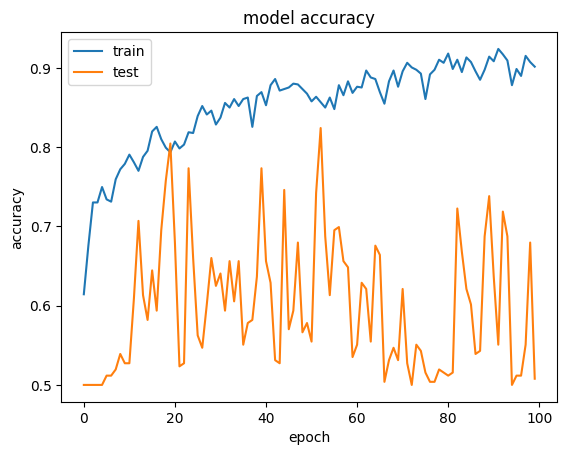

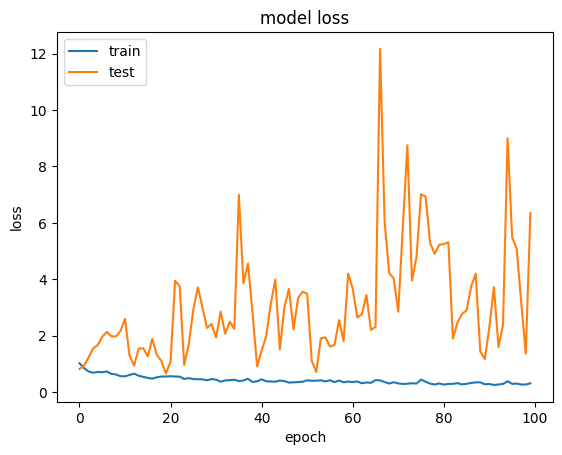

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()